<a href="https://colab.research.google.com/github/Aditi18singhal/projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
import pandas as pd

In [204]:
import matplotlib.pyplot as plt


In [205]:
import seaborn as sns

In [206]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [207]:
df['Pclass'].unique()

array([3, 1, 2])

In [208]:
# categoricl column
#Survived, Pclass,sex,Sibsp,Parch,Embarked

In [209]:
# numerical column
#age, Fare, PassengerID

In [210]:
# Mixed column
#name, ticket,cabin

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [212]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [213]:
# few conclusions
# missing values in cloumns age,cabin and emabrked
# more than 70% values are missing in cabin so we drop
# few columns have inappropriate datatype

In [214]:
# drop the cabin column
df.drop(columns=['Cabin'],inplace=True)

In [215]:
# fill the missing values in age with mean


In [216]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [217]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [218]:
# filling missing value in embarked with most appeared value


In [219]:
df['Embarked']=df['Embarked'].fillna('S')

In [220]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [221]:
df['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [222]:
# changing the datatype of columns
# survived(category)
#Pclass(category)
#Sex(category)
#Age(int)
#Emabarked(category)

In [223]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [225]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [226]:
# average age of passengers is 29

In [227]:
# Univariate analysis

<Axes: xlabel='Survived', ylabel='count'>

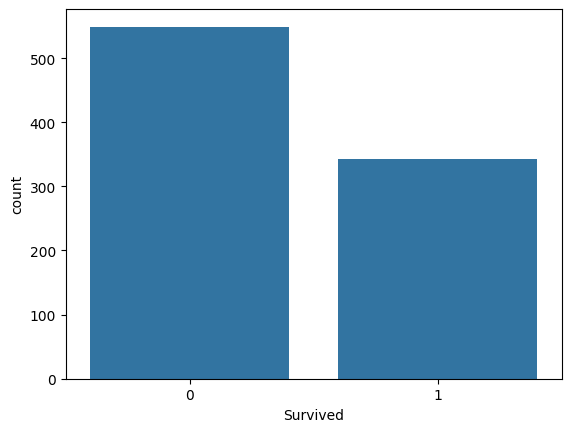

In [228]:
sns.countplot(x=df['Survived'])


In [229]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [230]:
print((df['Survived'].value_counts()/891)*100)

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64


In [231]:
# death percentage (62%) is more than non-death percentage

In [232]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [233]:
print((df['Pclass'].value_counts()/891)*100)

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


In [234]:
# in Pclass 3 more people is travelling

<Axes: xlabel='Pclass', ylabel='count'>

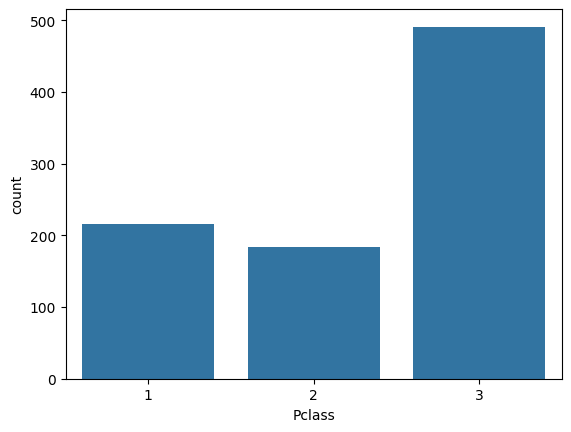

In [235]:
sns.countplot(x=df['Pclass'])

In [236]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [237]:
print((df['Sex'].value_counts()/891)*100)

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


In [238]:
# male percentage(65%) is more than female percentage

<Axes: xlabel='Sex', ylabel='count'>

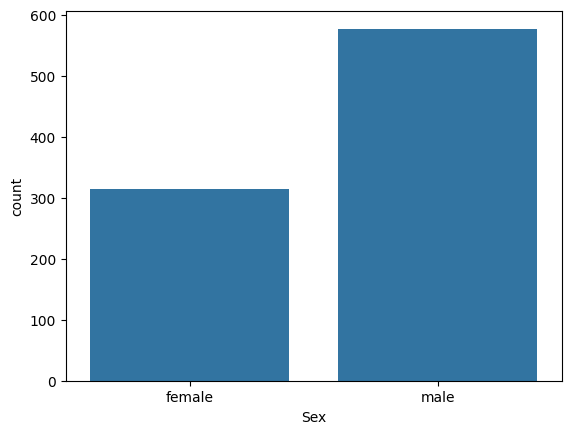

In [239]:
sns.countplot(x=df['Sex'])

In [240]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [241]:
# people travelling alone is more than any other

<Axes: xlabel='SibSp', ylabel='count'>

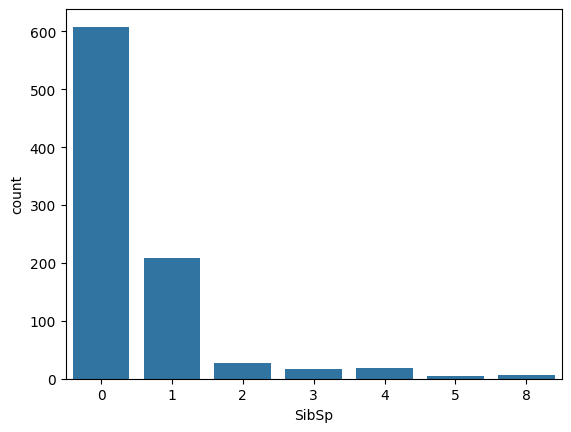

In [242]:
sns.countplot(x=df['SibSp'])

In [243]:
df['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [244]:
# here also travelling alone is more

<Axes: xlabel='Parch', ylabel='count'>

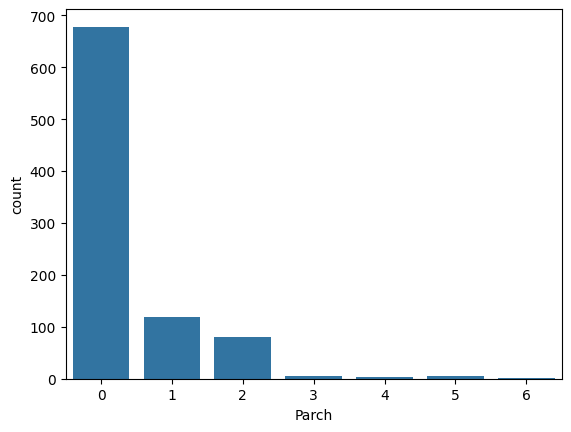

In [245]:
sns.countplot(x=df['Parch'])

In [246]:
print((df['Parch'].value_counts()/891)*100)

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


In [247]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [248]:
# more people travelling to city S so may be this will be last city

<Axes: xlabel='Embarked', ylabel='count'>

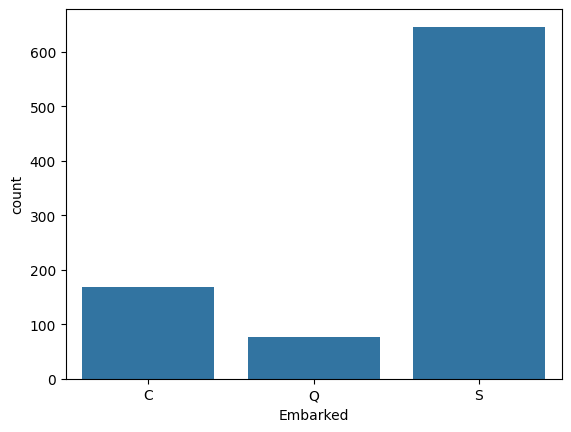

In [249]:
sns.countplot(x=df['Embarked'])

In [250]:
print((df['Embarked'].value_counts()/891)*100)

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

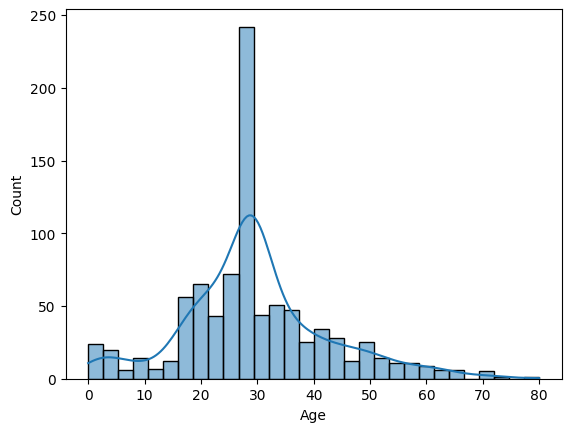

In [251]:
sns.histplot(df['Age'],kde=True)

<Axes: ylabel='Age'>

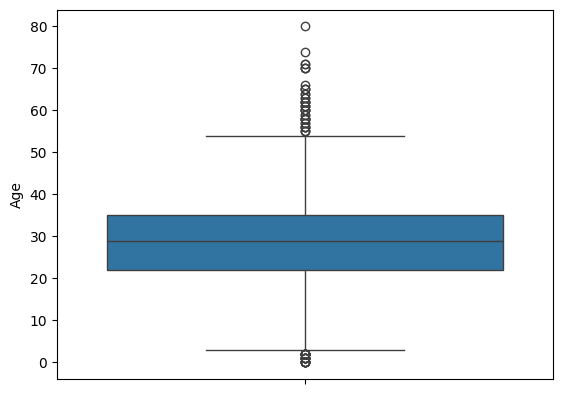

In [252]:
sns.boxplot(df['Age'])

<Axes: xlabel='Fare', ylabel='Count'>

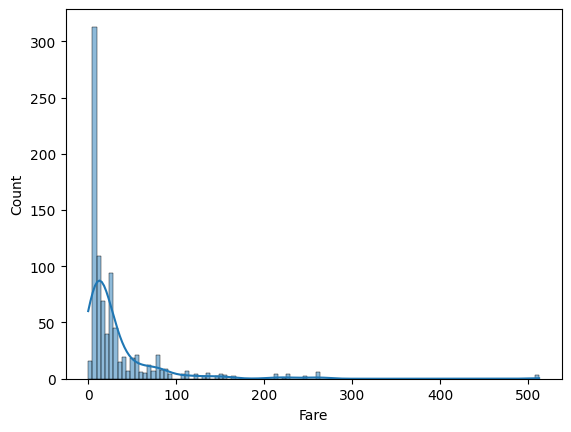

In [253]:
sns.histplot(df['Fare'],kde=True)

<Axes: ylabel='Fare'>

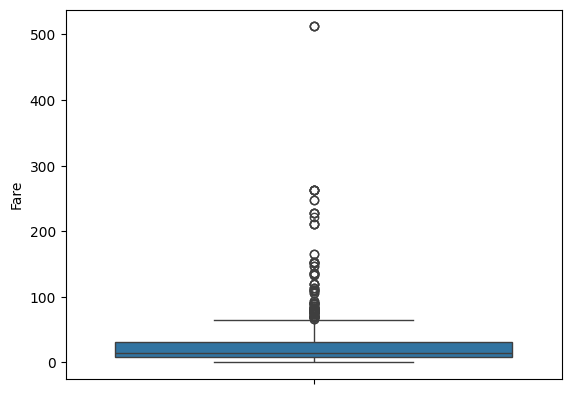

In [254]:
sns.boxplot(df['Fare'])

In [255]:
# lot of people have cheaper tickets

In [256]:
# Multivariate analysis

In [257]:
#survival and Pclass

<Axes: xlabel='Survived', ylabel='count'>

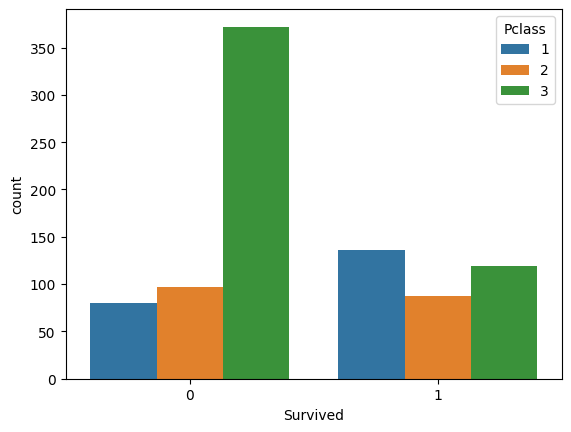

In [258]:
sns.countplot(x='Survived', hue='Pclass',data=df)

In [259]:
df['Survived']=df['Survived'].astype('int')

In [289]:
pivot_table = pd.pivot_table(df, index='Pclass', columns='Survived',values='PassengerId', aggfunc='count')
percentages=(pivot_table.div(pivot_table.sum(axis=1),axis=0))*100
pivot_table
percentages


<ipython-input-289-169071166>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df, index='Pclass', columns='Survived',values='PassengerId', aggfunc='count')


Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


In [ ]:
# in Pclass 3 more people(75%) died so it this class is deadly

In [261]:
# surivival and sex

In [290]:
pivot_table = pd.pivot_table(df, index='Sex', columns='Survived',values='PassengerId', aggfunc='count')
percentages=(pivot_table.div(pivot_table.sum(axis=1),axis=0))*100
pivot_table
percentages

<ipython-input-290-3966295959>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df, index='Sex', columns='Survived',values='PassengerId', aggfunc='count')


Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


In [ ]:
#  More females (75%) survived and less male suvived

<Axes: xlabel='Survived', ylabel='count'>

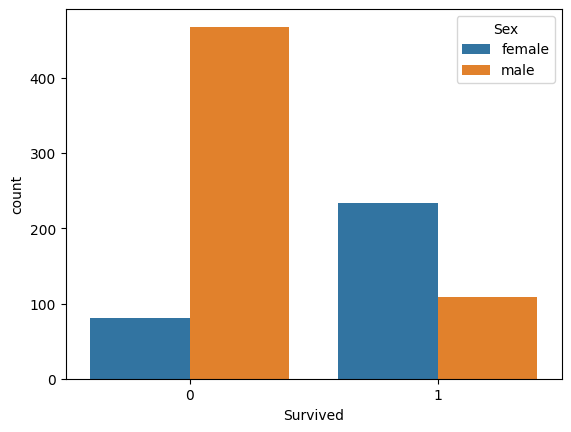

In [262]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [263]:
#survival and embarked

In [291]:
pivot_table = pd.pivot_table(df, index='Embarked', columns='Survived',values='PassengerId', aggfunc='count')
percentages=(pivot_table.div(pivot_table.sum(axis=1),axis=0))*100
pivot_table
percentages

<ipython-input-291-4262433665>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df, index='Embarked', columns='Survived',values='PassengerId', aggfunc='count')


Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.099071,33.900929


In [ ]:
# people for destination C survived more (55%) as compared to destination Q and S

<Axes: xlabel='Survived', ylabel='count'>

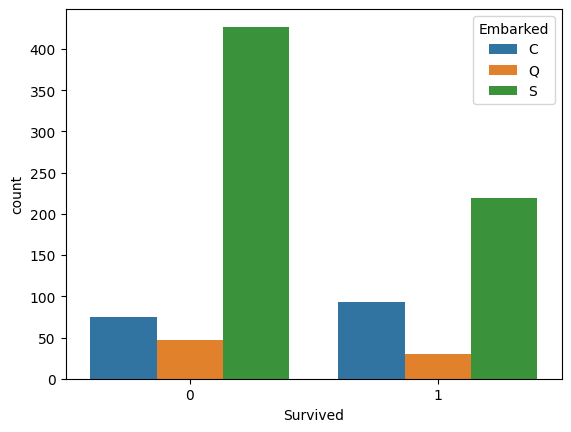

In [264]:
sns.countplot(x='Survived',hue='Embarked',data=df)

In [265]:
# Survival and age

<Axes: xlabel='Survived', ylabel='count'>

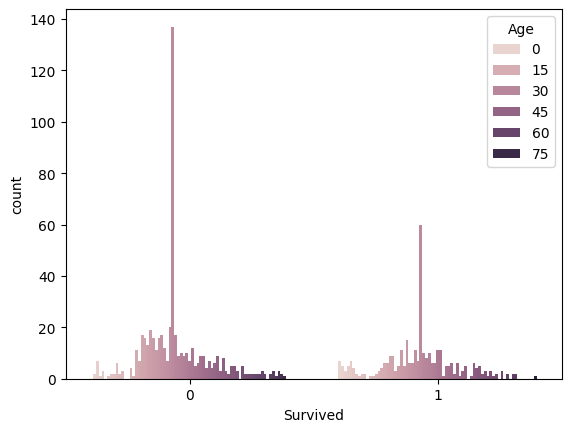

In [266]:
sns.countplot(x='Survived',hue='Age',data=df)

<ipython-input-267-1588672756>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
<ipython-input-267-1588672756>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'])


Text(0, 0.5, 'Density')

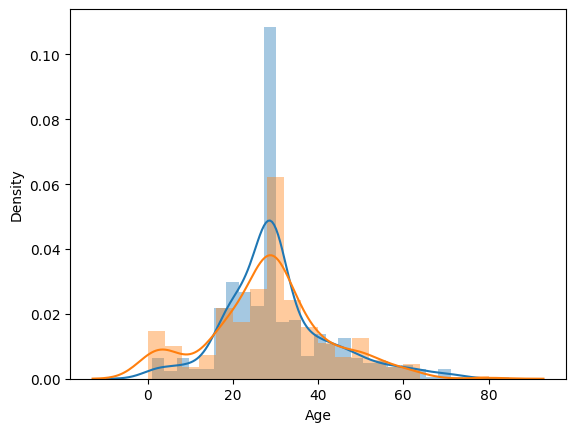

In [267]:
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])
plt.xlabel('Age')
plt.ylabel('Density')

In [ ]:
# people aged between 15 and 35 have more death rate and more than 35 death rate is less or i say in range 20 to 40 death rate is more

In [268]:
# survived and fare

<ipython-input-269-4212608554>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
<ipython-input-269-4212608554>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Fare'])


Text(0, 0.5, 'Density')

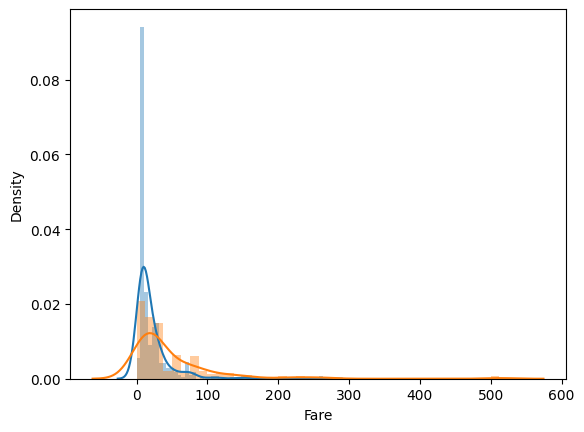

In [269]:
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])
plt.xlabel('Fare')
plt.ylabel('Density')

In [ ]:
# in lower fare , people have more death rate

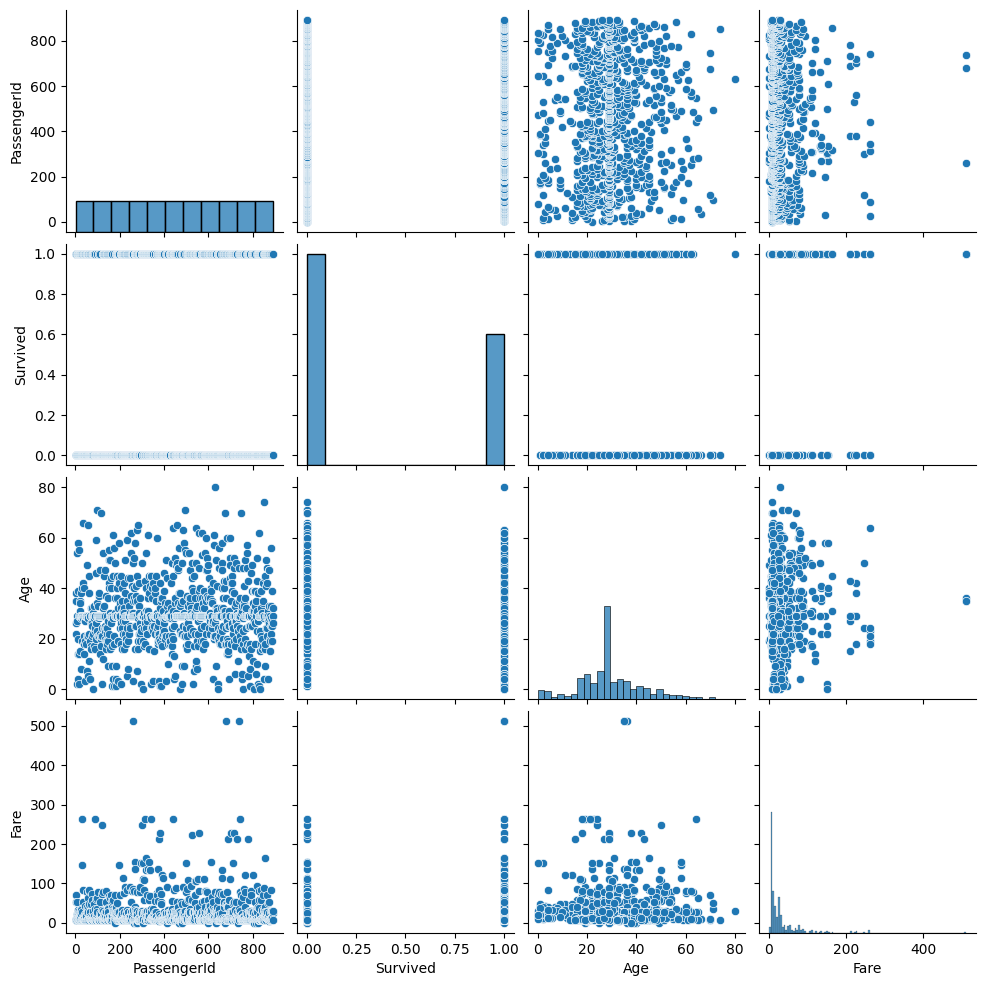

In [292]:
sns.pairplot(df)

In [270]:
# creating new column

In [271]:
df['family_size']=df['Parch']+df['SibSp']


In [272]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34,0,0,363294,8.0500,S,0
112,113,0,3,"Barton, Mr. David John",male,22,0,0,324669,8.0500,S,0
33,34,0,2,"Wheadon, Mr. Edward H",male,66,0,0,C.A. 24579,10.5000,S,0
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,29,0,0,330980,7.8792,Q,0
76,77,0,3,"Staneff, Mr. Ivan",male,29,0,0,349208,7.8958,S,0
661,662,0,3,"Badt, Mr. Mohamed",male,40,0,0,2623,7.2250,C,0
176,177,0,3,"Lefebre, Master. Henry Forbes",male,29,3,1,4133,25.4667,S,4
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9,1,1,C.A. 37671,15.9000,S,2
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29,1,0,2926,26.0000,S,1
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18,0,0,29108,11.5000,S,0


In [273]:
df['family_size'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [274]:
# we will create new column  named as family_type

In [275]:
def family_type(number):
  if number==0:
    return 'Alone'
  elif number>0 and number<=4:
    return 'Medium'
  else:
    return 'Large'


In [276]:
df['family_type']=df['family_size'].apply(family_type)

In [277]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
404,405,0,3,"Oreskovic, Miss. Marija",female,20,0,0,315096,8.6625,S,0,Alone
611,612,0,3,"Jardin, Mr. Jose Neto",male,29,0,0,SOTON/O.Q. 3101305,7.0500,S,0,Alone
691,692,1,3,"Karun, Miss. Manca",female,4,0,1,349256,13.4167,C,1,Medium
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36,1,0,349910,15.5500,S,1,Medium
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34,1,1,28220,32.5000,S,2,Medium


In [278]:
# droppping SibSp,Parch,family_size

In [279]:
df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [280]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
462,463,0,1,"Gee, Mr. Arthur H",male,47,111320,38.500,S,Alone
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8,349909,21.075,S,Medium
751,752,1,3,"Moor, Master. Meier",male,6,392096,12.475,S,Medium
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25,349237,17.800,S,Medium
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33,3101278,15.850,S,Medium


In [293]:
pivot_table = pd.pivot_table(df, index='family_type', columns='Survived',values='PassengerId', aggfunc='count')
percentages=(pivot_table.div(pivot_table.sum(axis=1),axis=0))*100
pivot_table
percentages

Survived,0,1
family_type,,
Alone,69.646182,30.353818
Large,85.106383,14.893617
Medium,43.973941,56.026059


In [ ]:
# there is more chances(56%) when person is travelling with medium families as compaed to alone and small families

In [281]:
# conclusions
# chance of female survival is higher than male survival
# travelling in Pclass 3 was dealiest
# somehow, people going to C surviced More
# people in the age group of 20 to 40 had a higher chances of not surviving
# people travelling with smaller families had a chance of surviving the accident in comparison to people with large families and travelling alone
# deeper analysis is required for handling outliers